Data retrieved from http://archive.ics.uci.edu/ml/datasets/Iris

We will be looking at a set of data detailing petal length and widths as well as sepal length and widths. We will create a model that will predict which of the three species of iris a set of lengths and widths belongs to. 

A few things to note:

    1. The data set is small (150) so analyzing the whole thing is not difficult, or time consuming.

    2. The data came with information about the data as well as some summary statistics. I will compare my findings with the provided summary statistics as a sanity check, and I'll be using their attribute information as my columns.

The project will start with creating a dataframe from a csv ( technically a .data file but it is formatted as a csv), and poking at the data for a bit. 

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iris.data", names = ["Sepal Length (cm)","Sepal Width (cm)", "Petal Length (cm)", "Petal Width (cm)","Class"])
df.dtypes #checking to make sure what is a float is in fact a float.

Sepal Length (cm)    float64
Sepal Width (cm)     float64
Petal Length (cm)    float64
Petal Width (cm)     float64
Class                 object
dtype: object

It turns out the original document did not have column headings so they were simply added into the file via the names argument.

In [3]:
df.describe()


,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df[df['Class'] == 'Iris-setosa'].describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [5]:
df[df['Class'] == 'Iris-versicolor'].describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [7]:
df[df['Class'] == 'Iris-virginica'].describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


<AxesSubplot:>

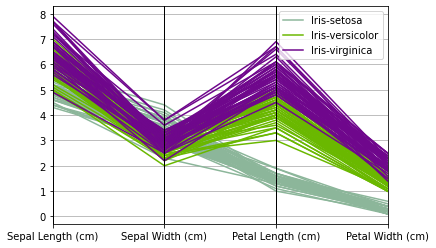

In [39]:
pd.plotting.parallel_coordinates(df,'Class')

Using both the raw statistics and the graph, a few things can be noted. 

Though you could figure this out from the tables, the graphs make it easy to see which variable has the 3 classes separated the best. Petal Length and Width has 3 almost distinct regions for the classes. There is overlap with versicolor and virginica which would likely be a source of error. Sepal Length and Width is much less distinct.

I will be using K Neighbors Classification so there's no benefit to doing each variable separately, but it is nice to analyze the data beforehand since it will help in predicting how good the model will be and where the errors will occur. It seems that any miscategorization will happen between Versicolor and Virginica since it has the most overlap for Petal Length and Width. Solely based on how nicely divided into distinct sections the Petal Length and Width is, the model should be pretty good.
 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y = df["Class"]
x = df.drop('Class', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)
acc

0.9666666666666667

In [18]:
predSeries = pd.Series(data=y_pred, index = y_test.index)
y_test.compare(predSeries)

,self,other
63,Iris-versicolor,Iris-virginica


In [19]:
df.iloc[63]

Sepal Length (cm)                6.1
Sepal Width (cm)                 2.9
Petal Length (cm)                4.7
Petal Width (cm)                 1.4
Class                Iris-versicolor
Name: 63, dtype: object

Only one incorrect for the 30 tested values is pretty good, and it appared where expected: at the upper edge of versicolor's range and at the bottom edge of virginica's range.